### A First Application: Classifying iris species
#### Meet the data

In [4]:
from preamble import *
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
type(iris_dataset)

sklearn.utils.Bunch

In [6]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [7]:
print(iris_dataset['DESCR'][:] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [9]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [11]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [12]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [13]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [14]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [15]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and testing data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [17]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [18]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


#### First things first: Look at your data

In [19]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.9               3.0                4.2               1.5
1                  5.8               2.6                4.0               1.2
2                  6.8               3.0                5.5               2.1
3                  4.7               3.2                1.3               0.2
4                  6.9               3.1                5.1               2.3
5                  5.0               3.5                1.6               0.6
6                  5.4               3.7                1.5               0.2
7                  5.0               2.0                3.5               1.0
8                  6.5               3.0                5.5               1.8
9                  6.7               3.3                5.7               2.5
10                 6.0               2.2                5.0               1.5
11                 6.7               2.5                5.8               1.8
12                 5.6               2.5                3.9               1.1
13                 7.7               3.0                6.1               2.3
14                 6.3               3.3                4.7               1.6
15                 5.5               2.4                3.8               1.1
16                 6.3               2.7                4.9               1.8
17                 6.3               2.8                5.1               1.5
18                 4.9               2.5                4.5               1.7
19                 6.3               2.5                5.0               1.9
20                 7.0               3.2                4.7               1.4
21                 6.5               3.0                5.2               2.0
22                 6.0               3.4                4.5               1.6
23                 4.8               3.1                1.6               0.2
24                 5.8               2.7                5.1               1.9
25                 5.6               2.7                4.2               1.3
26                 5.6               2.9                3.6               1.3
27                 5.5               2.5                4.0               1.3
28                 6.1               3.0                4.6               1.4
29                 7.2               3.2                6.0               1.8
..                 ...               ...                ...               ...
82                 5.8               4.0                1.2               0.2
83                 7.7               2.8                6.7               2.0
84                 5.1               3.8                1.5               0.3
85                 4.7               3.2                1.6               0.2
86                 7.4               2.8                6.1               1.9
87                 5.0               3.3                1.4               0.2
88                 6.3               3.4                5.6               2.4
89                 5.7               2.8                4.1               1.3
90                 5.8               2.7                3.9               1.2
91                 5.7               2.6                3.5               1.0
92                 6.4               3.2                5.3               2.3
93                 6.7               3.0                5.2               2.3
94                 6.3               2.5                4.9               1.5
95                 6.7               3.0                5.0               1.7
96                 5.0               3.0                1.6               0.2
97                 5.5               2.4                3.7               1.0
98                 6.7               3.1                5.6               2.4
99                 5.8               2.7                5.1               1.9
100                5.1               3.4                1.5               0.2
101                6.6     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110789668>,
      dtype=object)

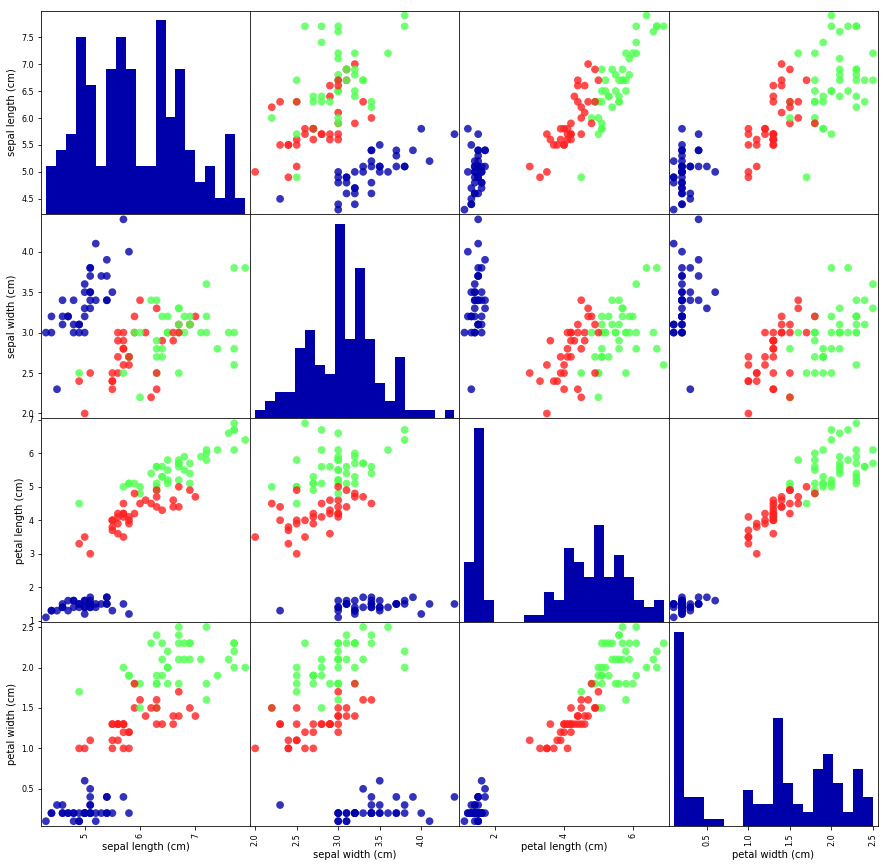

In [20]:
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

#### Building your first model: k nearest neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Making predictions

In [23]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [24]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the model

In [25]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print(y_pred == y_test)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]


In [26]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [27]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary and Outlook

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
